In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from astropy.cosmology import Planck18 as cosmo 

In [2]:
output_directory = '/home/asvoboda/KDC/notebooks/DP0/output'

# read all csv files in the output folder and put into a DataFrame
def load_kilonovae_data(directory):
    all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    df_list = []
    for file in all_files:
        df = pd.read_csv(file)
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

In [3]:
kn_data = load_kilonovae_data(output_directory)

FileNotFoundError: [Errno 2] No such file or directory: '/home/asvoboda/KDC/notebooks/DP0/output'

In [21]:
assert 'redshift' in kn_data.columns, "Data must contain 'redshift' column"
kn_data = kn_data.dropna(subset=['redshift'])

In [22]:
# calculate the luminosity distance using the redshift
kn_data['luminosity_distance'] = cosmo.luminosity_distance(kn_data['redshift']).value

In [23]:
# calculate the distance modulus
kn_data['distance_modulus'] = 5 * np.log10(kn_data['luminosity_distance'] * 1e6 / 10)

In [24]:
#simulate observational effects
def observed_by_camera(df):
    df_observed = df.copy()
    df_observed['luminosity_distance'] *= np.random.normal(1, 0.05, len(df))
    df_observed['distance_modulus'] += np.random.normal(0, 0.1, len(df))
    return df_observed

In [25]:
# applies observational effects
kn_data_observed = observed_by_camera(kn_data)

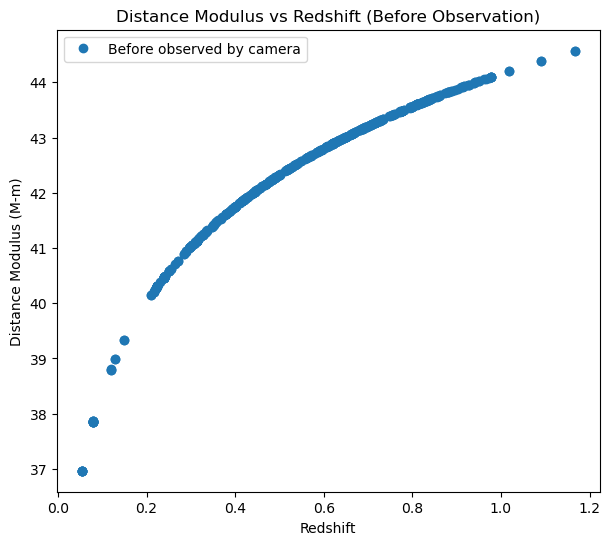

In [26]:
# distance modulus vs redshift before observed by camera
plt.figure(figsize=(7, 6))
plt.plot(kn_data['redshift'], kn_data['distance_modulus'], 'o', label='Before observed by camera')
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus (M-m)')
plt.title('Distance Modulus vs Redshift (Before Observation)')
plt.legend()
plt.show()

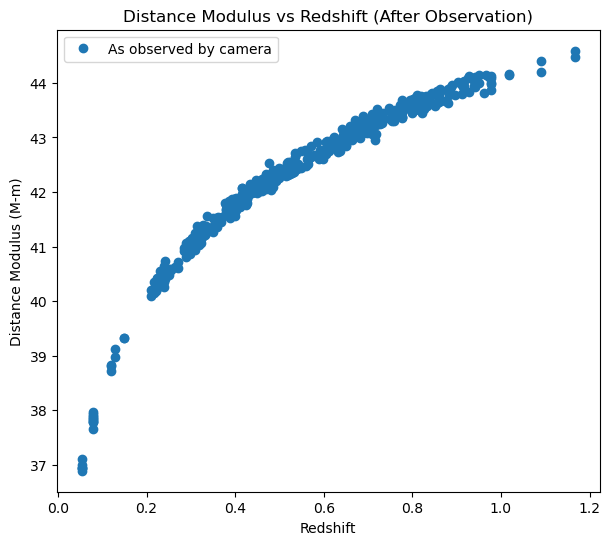

In [27]:
# distance modulus vs redshift as observed by camera
plt.figure(figsize=(7, 6))
plt.plot(kn_data_observed['redshift'], kn_data_observed['distance_modulus'], 'o', label='As observed by camera')
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus (M-m)')
plt.title('Distance Modulus vs Redshift (After Observation)')
plt.legend()
plt.show()

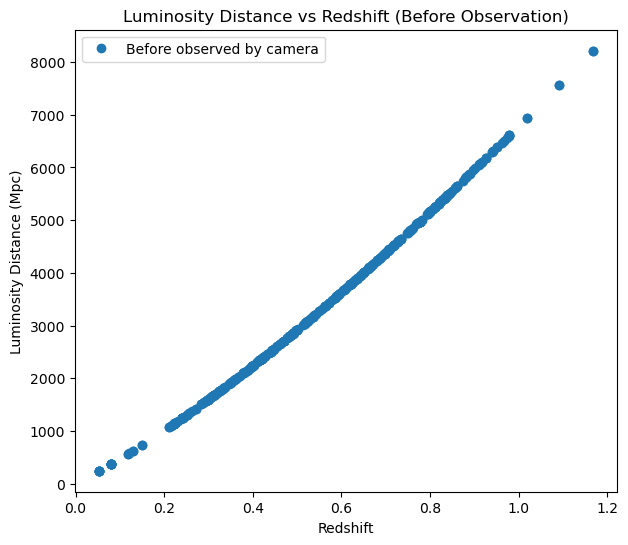

In [28]:
# luminosity distance vs redshift before observed by camera
plt.figure(figsize=(7, 6))
plt.plot(kn_data['redshift'], kn_data['luminosity_distance'], 'o', label='Before observed by camera')
plt.xlabel('Redshift')
plt.ylabel('Luminosity Distance (Mpc)')
plt.title('Luminosity Distance vs Redshift (Before Observation)')
plt.legend()
plt.show()

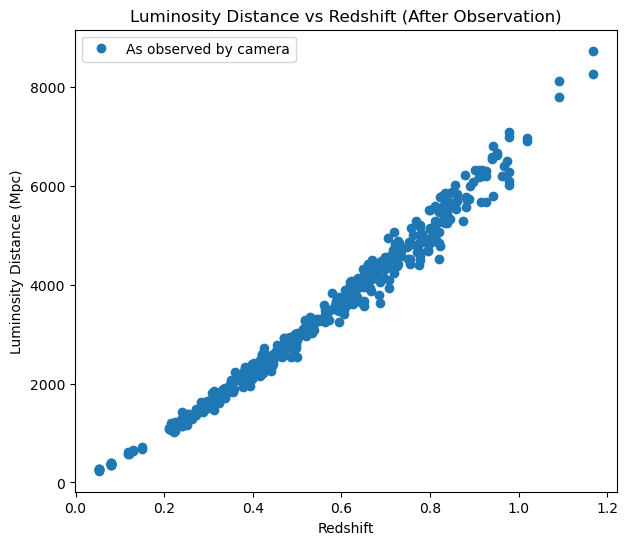

In [29]:
# luminosity distance vs redshift as observed by camera
plt.figure(figsize=(7, 6))
plt.plot(kn_data_observed['redshift'], kn_data_observed['luminosity_distance'], 'o', label='As observed by camera')
plt.xlabel('Redshift')
plt.ylabel('Luminosity Distance (Mpc)')
plt.title('Luminosity Distance vs Redshift (After Observation)')
plt.legend()
plt.show()